# **IDENTIFIKASI TUMOR OTAK MENGGUNAKAN MODEL DEEP LEARNING BERBASIS VISION TRANSFORMER (VIT)**

**NAMA: GILANG EKAYANDA** <BR>
**NIM : 22.11.4833** <BR>
**KELAS : 22S1IF-PROYEK DATA MINING 4(ST167)**

**LINK COLAB: https://colab.research.google.com/drive/1eSI14m1397ZJGu0MAbkflnyv1P5t7KF-?usp=sharing** <BR>
**LINK DATASET: https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset?select=metadata_rgb_only.csv**

# **MENAMPILKAN SAMPEL DATASET**

In [ ]:
# Mengimpor kelas 'drive' dari pustaka google.colab untuk menghubungkan Google Colab dengan Google Drive
from google.colab import drive
# Menghubungkan (mount) Google Drive ke direktori '/content/drive' di lingkungan Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menginstal pustaka 'split-folders' untuk membagi dataset, 'timm' untuk model pretrained, dan 'torch-summary' untuk ringkasan model
!pip install split-folders timm torch-summary
# Mengimpor pustaka 'os' untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori
import os
# Mengimpor pustaka 'copy' untuk membuat salinan objek
import copy
# Mengimpor pustaka 'random' untuk menghasilkan angka acak
import random
# Mengimpor pustaka 'warnings' untuk mengelola pesan peringatan
import warnings
# Mengimpor pustaka 'numpy' (dengan alias 'np') untuk operasi numerik, terutama array multidimensi
import numpy as np
# Mengimpor pustaka 'pandas' (dengan alias 'pd') untuk manipulasi dan analisis data, khususnya DataFrame
import pandas as pd
# Mengimpor 'matplotlib.pyplot' (alias 'plt') untuk membuat visualisasi dan plot
import matplotlib.pyplot as plt
# Mengimpor 'seaborn' (alias 'sns') untuk visualisasi data statistik yang lebih menarik; mengatur gaya default ke 'darkgrid'
import seaborn as sns; sns.set(style='darkgrid')
# Mengimpor 'cv2' (OpenCV) untuk pemrosesan gambar
import cv2
# Mengimpor pustaka 'splitfolders' untuk membagi dataset gambar ke dalam folder train, val, dan test
import splitfolders
# Mengimpor kembali 'matplotlib.pyplot' (sudah diimpor sebelumnya, ini redundan)
import matplotlib.pyplot as plt
# Mengimpor kembali 'seaborn' (sudah diimpor sebelumnya, ini redundan)
import seaborn as sns
# Mengimpor kelas 'Image' dari pustaka 'Pillow' (PIL) untuk bekerja dengan gambar
from PIL import Image
# Mengimpor kelas 'Counter' dari pustaka 'collections' untuk menghitung frekuensi item dalam list
from collections import Counter
# Mengimpor kelas 'Path' dari pustaka 'pathlib' untuk bekerja dengan path file secara object-oriented
from pathlib import Path
# Mengimpor pustaka 'itertools' untuk bekerja dengan iterator
import itertools
# Mengimpor kembali pustaka 'pathlib' (sudah diimpor sebelumnya, ini redundan)
import pathlib
# Mengimpor pustaka utama 'torch' untuk deep learning
import torch
# Mengimpor 'nn' dari 'torch' yang berisi modul untuk membangun jaringan saraf (layer, fungsi aktivasi, dll.)
import torch.nn as nn
# Mengimpor 'F' dari 'torch.nn' yang berisi fungsi-fungsi seperti fungsi aktivasi dan loss
import torch.nn.functional as F
# Mengimpor 'optim' dari 'torch' yang berisi algoritma optimisasi seperti Adam dan SGD
from torch import optim
# Mengimpor 'DataLoader', 'Dataset', dan 'random_split' untuk memuat dan memproses dataset
from torch.utils.data import DataLoader, Dataset, random_split
# Mengimpor 'ReduceLROnPlateau' untuk mengurangi learning rate secara dinamis selama training
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Mengimpor 'torchvision' yang menyediakan dataset populer, arsitektur model, dan transformasi gambar untuk PyTorch
import torchvision
# Mengimpor 'transforms' dan 'utils' dari 'torchvision'
from torchvision import transforms, utils
# Mengimpor 'ImageFolder' untuk memuat dataset dari folder yang terstruktur berdasarkan kelas
from torchvision.datasets import ImageFolder

# Mengimpor fungsi 'create_model' dari pustaka 'timm' (PyTorch Image Models)
from timm import create_model
# Mengimpor fungsi 'summary' dari 'torchsummary' untuk menampilkan ringkasan arsitektur model
from torchsummary import summary

# Mengimpor metrik evaluasi dari 'scikit-learn' seperti confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Mengimpor 'tqdm' dan 'trange' dari 'tqdm.notebook' untuk menampilkan progress bar yang interaktif di notebook
from tqdm.notebook import tqdm, trange
# Mengimpor kembali 'roc_auc_score' dan 'roc_curve' dari 'sklearn.metrics' (redundan)
from sklearn.metrics import roc_auc_score, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Mendefinisikan path ke file metadata.csv di Google Drive
file_path = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/metadata.csv'
# Membaca file CSV menggunakan pandas dan menyimpannya sebagai DataFrame
labels_df = pd.read_csv(file_path)
# Menampilkan lima baris pertama dari DataFrame dalam format markdown untuk visualisasi yang rapi
print(labels_df.head().to_markdown())

|    |   Unnamed: 0 | image           | class   | format   | mode   | shape         |
|---:|-------------:|:----------------|:--------|:---------|:-------|:--------------|
|  0 |            0 | Cancer (1).jpg  | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  1 |            1 | Cancer (1).png  | tumor   | PNG      | L      | (300, 240)    |
|  2 |            2 | Cancer (1).tif  | tumor   | TIFF     | RGB    | (256, 256, 3) |
|  3 |            3 | Cancer (10).jpg | tumor   | JPEG     | RGB    | (512, 512, 3) |
|  4 |            4 | Cancer (10).tif | tumor   | TIFF     | RGB    | (256, 256, 3) |


In [ ]:
# Menampilkan daftar file dan folder di dalam direktori dataset tumor otak
os.listdir('/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/Brain Tumor Data Set/Brain Tumor Data Set')
# Mendefinisikan path direktori utama data
data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/Brain Tumor Data Set/Brain Tumor Data Set'
# Mengonversi path string menjadi objek Path dari pustaka pathlib untuk kemudahan manipulasi
data_dir = pathlib.Path(data_dir)

['Brain Tumor', 'Healthy']

In [ ]:
#splitfolders.ratio(data_dir, output='/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split', seed=20, ratio=(0.8, 0.2))

# Mendefinisikan path direktori data yang sudah dibagi menjadi folder train dan val
data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split'
# Mengonversi path string menjadi objek Path
data_dir = pathlib.Path(data_dir)

# **Preprocessing**

In [ ]:
# Membuat pipeline transformasi untuk data training (augmentasi data)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),              # Mengubah ukuran semua gambar menjadi 224x224 piksel
    transforms.RandomHorizontalFlip(p=0.5),     # Membalik gambar secara horizontal dengan probabilitas 50%
    transforms.RandomVerticalFlip(p=0.5),       # Membalik gambar secara vertikal dengan probabilitas 50%
    transforms.RandomRotation(30),              # Merotasi gambar secara acak hingga 30 derajat
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), # Melakukan crop acak dan resize kembali ke 224x224
    transforms.ColorJitter(brightness=0.3),     # Mengubah kecerahan gambar secara acak
    transforms.ToTensor(),                      # Mengonversi gambar dari format PIL/numpy ke format tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Menormalisasi tensor gambar menggunakan mean dari ImageNet
                         std=[0.229, 0.224, 0.225])   # Menormalisasi tensor gambar menggunakan standar deviasi dari ImageNet
])

# Membuat pipeline transformasi untuk data validasi (tanpa augmentasi acak)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),              # Mengubah ukuran gambar menjadi 224x224 piksel
    transforms.ToTensor(),                      # Mengonversi gambar ke format tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Menormalisasi tensor dengan mean dari ImageNet
                         std=[0.229, 0.224, 0.225])   # Menormalisasi tensor dengan std dari ImageNet
])

In [ ]:
# Membuat dataset training dari folder "train" dan menerapkan transformasi train_transform
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath("train"), transform=train_transform)

# Membuat dataset validasi dari folder "val" dan menerapkan transformasi val_transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath("val"), transform=val_transform)

# Menampilkan transformasi yang digunakan pada dataset training
print("Train transforms:", train_set.transform)

# Menampilkan transformasi yang digunakan pada dataset validasi
print("Val   transforms:", val_set.transform)

# Transformasi hanya resize dan ubah ke tensor
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ubah ukuran gambar menjadi 256x256 piksel
    transforms.ToTensor()           # Ubah ke tensor PyTorch dan skalakan nilai piksel ke [0,1]
])

# Transformasi flip horizontal secara pasti (p=1.0 artinya selalu di-flip)
horizontal_flip_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),  # Flip horizontal 100% dari gambar
    transforms.ToTensor()                    # Ubah ke tensor
])

# Transformasi flip vertikal secara pasti (p=1.0 artinya selalu di-flip)
vertical_flip_transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=1.0),  # Flip vertikal 100% dari gambar
    transforms.ToTensor()                  # Ubah ke tensor
])

# Transformasi rotasi acak hingga ±30 derajat
rotation_transform = transforms.Compose([
    transforms.RandomRotation(30),  # Rotasi gambar secara acak dalam rentang -30 sampai 30 derajat
    transforms.ToTensor()           # Ubah ke tensor
])

# Transformasi crop acak dari bagian gambar dengan skala 80%-100%, lalu resize ke 256x256
zoom_transform = transforms.Compose([
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),  # Zoom acak (crop sebagian gambar lalu resize)
    transforms.ToTensor()                                 # Ubah ke tensor
])

# Transformasi acak kecerahan gambar
brightness_transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.3),  # Ubah brightness secara acak (hingga ±30%)
    transforms.ToTensor()                    # Ubah ke tensor
])

# Transformasi normalisasi menggunakan mean dan std dari ImageNet
normalize_transform = transforms.Compose([
    transforms.ToTensor(),  # Ubah ke tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalisasi channel RGB
                         std =[0.229, 0.224, 0.225])  # Menggunakan nilai standar dari ImageNet
])

# Transformasi dasar hanya mengubah ke tensor saja
totensor_transform = transforms.Compose([
    transforms.ToTensor()  # Ubah ke tensor tanpa augmentasi
])

# List berisi nama transformasi dan objek transformasinya (untuk visualisasi atau percobaan)
transforms_list = [
    ('Resize', resize_transform),                 # Transformasi resize
    ('Horizontal Flip', horizontal_flip_transform), # Transformasi flip horizontal
    ('Vertical Flip', vertical_flip_transform),     # Transformasi flip vertikal
    ('Rotation', rotation_transform),             # Transformasi rotasi
    ('Zoom', zoom_transform),                     # Transformasi crop dan zoom
    ('Brightness', brightness_transform),         # Transformasi kecerahan
    ('ToTensor', totensor_transform),             # Transformasi to tensor saja
    ('Normalize', normalize_transform)            # Transformasi normalisasi
]

Train transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    ColorJitter(brightness=(0.7, 1.3), contrast=None, saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Val   transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


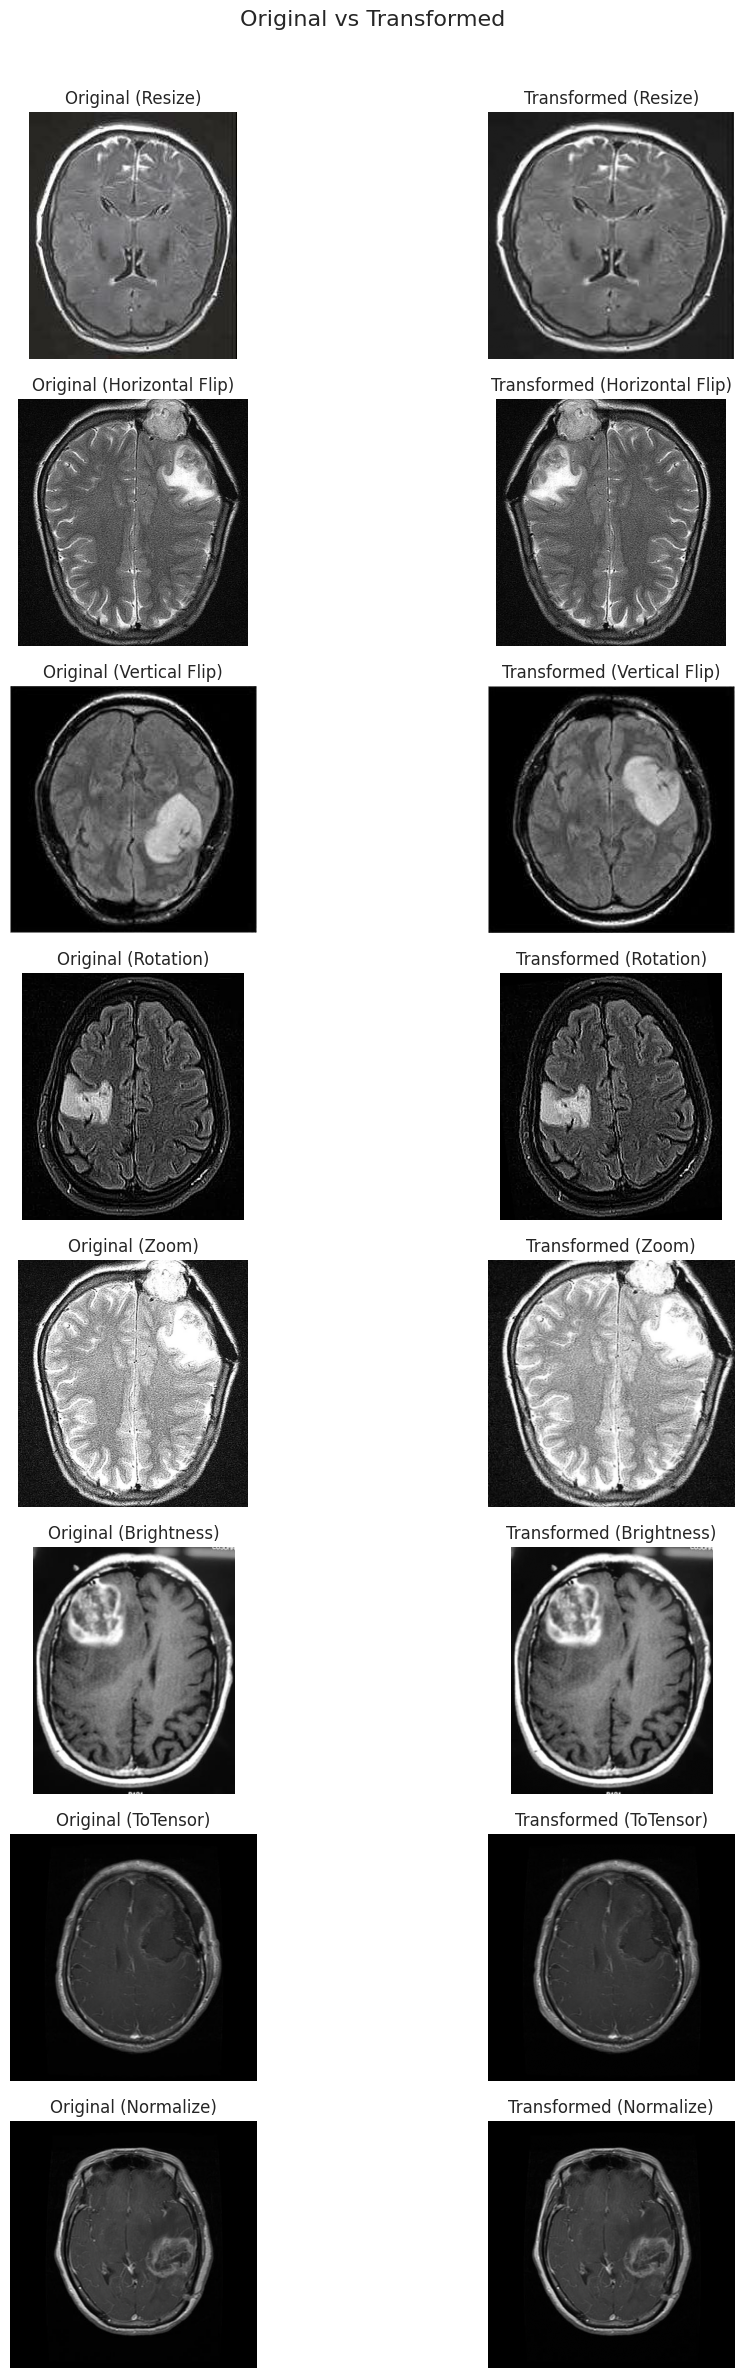

In [ ]:
# Ambil dataset original dari folder "train" tanpa transformasi apapun
original_dataset = torchvision.datasets.ImageFolder(data_dir.joinpath("train"))

# Buat figure dengan banyak subplot: satu baris untuk tiap transformasi (original vs transformed)
fig, axes = plt.subplots(len(transforms_list), 2, figsize=(12, 3 * len(transforms_list)))

# Judul besar untuk seluruh figure
fig.suptitle('Original vs Transformed', fontsize=16, y=0.99)

# Loop melalui setiap transformasi yang ada dalam transforms_list
for idx, (name, fn) in enumerate(transforms_list):
    # Ambil gambar random dari original_dataset
    img, _ = original_dataset[torch.randint(len(original_dataset), (1,)).item()]

    # Jika gambar berupa tensor, ubah jadi PIL Image
    img_pil = transforms.ToPILImage()(img) if isinstance(img, torch.Tensor) else img

    # Terapkan transformasi ke gambar
    img_t = fn(img_pil)

    # Ubah hasil transformasi ke format numpy array dan transpose channel ke urutan (H, W, C)
    img_np = img_t.numpy().transpose(1, 2, 0)

    # Jika transformasi adalah Normalize, balikan normalisasi agar bisa ditampilkan
    if name == 'Normalize':
        img_np = (img_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)
    else:
        # Jika bukan Normalize, cukup clip agar nilai tetap dalam [0,1]
        img_np = img_np.clip(0, 1)

    # Ubah gambar hasil transformasi ke grayscale untuk ditampilkan
    gray = np.dot(img_np[..., :3], [0.2989, 0.5870, 0.1140])  # konversi RGB ke grayscale

    # Tampilkan gambar original di kolom kiri
    ax_o = axes[idx, 0]
    ax_o.imshow(np.array(img_pil))  # tampilkan gambar original
    ax_o.set_title(f"Original ({name})")  # beri judul
    ax_o.axis('off')  # hilangkan axis

    # Tampilkan gambar hasil transformasi di kolom kanan
    ax_t = axes[idx, 1]
    ax_t.imshow(gray, cmap='gray')  # tampilkan dalam format grayscale
    ax_t.set_title(f"Transformed ({name})")  # beri judul
    ax_t.axis('off')  # hilangkan axis

# Atur layout agar tidak saling bertumpuk
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Tampilkan hasil plot
plt.show()


# **EDA**

In [ ]:
data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/Brain Tumor Data Set/Brain Tumor Data Set'
data_dir = pathlib.Path(data_dir)

#splitfolders.ratio(data_dir, output='/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split', seed=20, ratio=(0.8, 0.2))

#data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split'
#data_dir = pathlib.Path(data_dir)

In [ ]:
# Membuat dataset menggunakan ImageFolder dari direktori data mentah
dataset = ImageFolder(data_dir)
# Mendefinisikan kamus (dictionary) untuk memetakan indeks kelas (0, 1) ke nama label yang mudah dibaca
CLA_label = {0: 'Brain Tumor', 1: 'Healthy'}

# 1. Menghitung jumlah data per kelas
# Membuat list yang berisi semua label dari dataset
labels = [label for _, label in dataset.samples]
# Menghitung frekuensi setiap label menggunakan Counter
class_counts = Counter(labels)
# Mencetak judul
print("Jumlah data per kelas:")
# Melakukan iterasi melalui hasil perhitungan dan mencetak jumlah untuk setiap kelas
for cls_idx, cnt in class_counts.items():
    print(f"  {CLA_label[cls_idx]}: {cnt}")

Jumlah data per kelas:
  Brain Tumor: 2513
  Healthy: 2087


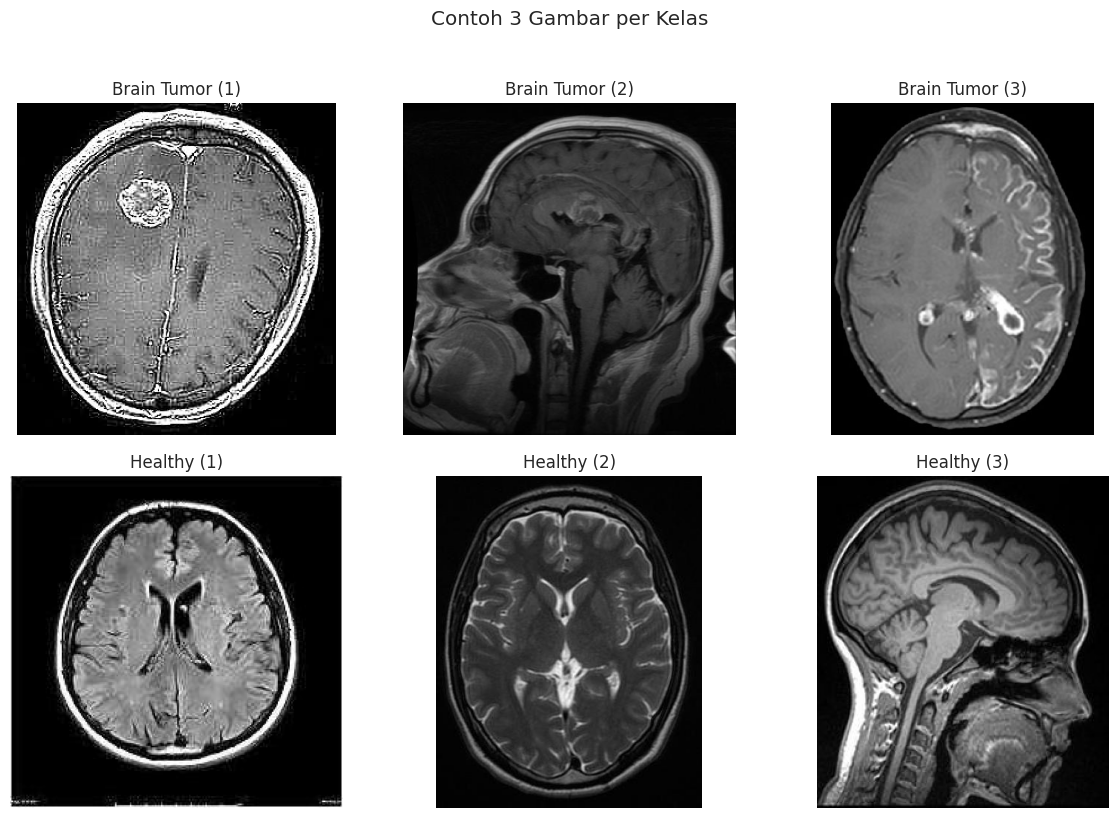

In [ ]:
# 2. Contoh gambar dari setiap kelas
# Menentukan jumlah gambar yang ingin ditampilkan per kelas
n_per_class = 3

# Mengambil semua label unik dari dataset dan mengurutkannya
classes = sorted({lab for _, lab in dataset.samples})

# Membuat grid subplot dengan jumlah baris sebanyak jumlah kelas, dan kolom sebanyak n_per_class
fig, axes = plt.subplots(len(classes), n_per_class, figsize=(4*n_per_class, 4*len(classes)))

# Looping untuk setiap kelas
for row, cls_idx in enumerate(classes):
    # Mengambil semua indeks sample yang labelnya sama dengan kelas saat ini
    idxs = [i for i, (_, lab) in enumerate(dataset.samples) if lab == cls_idx]

    # Memilih sejumlah sampel acak dari indeks yang telah dikumpulkan, maksimum sebanyak n_per_class
    selected = random.sample(idxs, k=min(n_per_class, len(idxs)))

    # Looping untuk setiap gambar yang dipilih secara acak
    for col, idx in enumerate(selected):
        # Mengambil path gambar dan label dari dataset
        img_path, _ = dataset.samples[idx]

        # Membuka gambar dan mengubah ke format RGB
        img = Image.open(img_path).convert('RGB')

        # Menentukan subplot tempat gambar akan ditampilkan
        ax = axes[row, col] if len(classes) > 1 else axes[col]

        # Menampilkan gambar pada subplot
        ax.imshow(img)

        # Menetapkan judul pada setiap gambar dengan label kelas dan nomor urutnya
        ax.set_title(f"{CLA_label[cls_idx]} ({col+1})")

        # Menghilangkan sumbu pada subplot
        ax.axis('off')

# Menambahkan judul utama di atas semua gambar
plt.suptitle("Contoh 3 Gambar per Kelas", y=1.02)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan semua gambar
plt.show()



Ukuran (dimensi) untuk 6 gambar acak:
  Cancer (947).jpg: 240 x 300
  Cancer (393).jpg: 512 x 512
  Cancer (549).jpg: 512 x 512
  Not Cancer  (1682).jpg: 225 x 225
  Cancer (962).jpg: 450 x 446
  Cancer (2206).jpg: 194 x 260


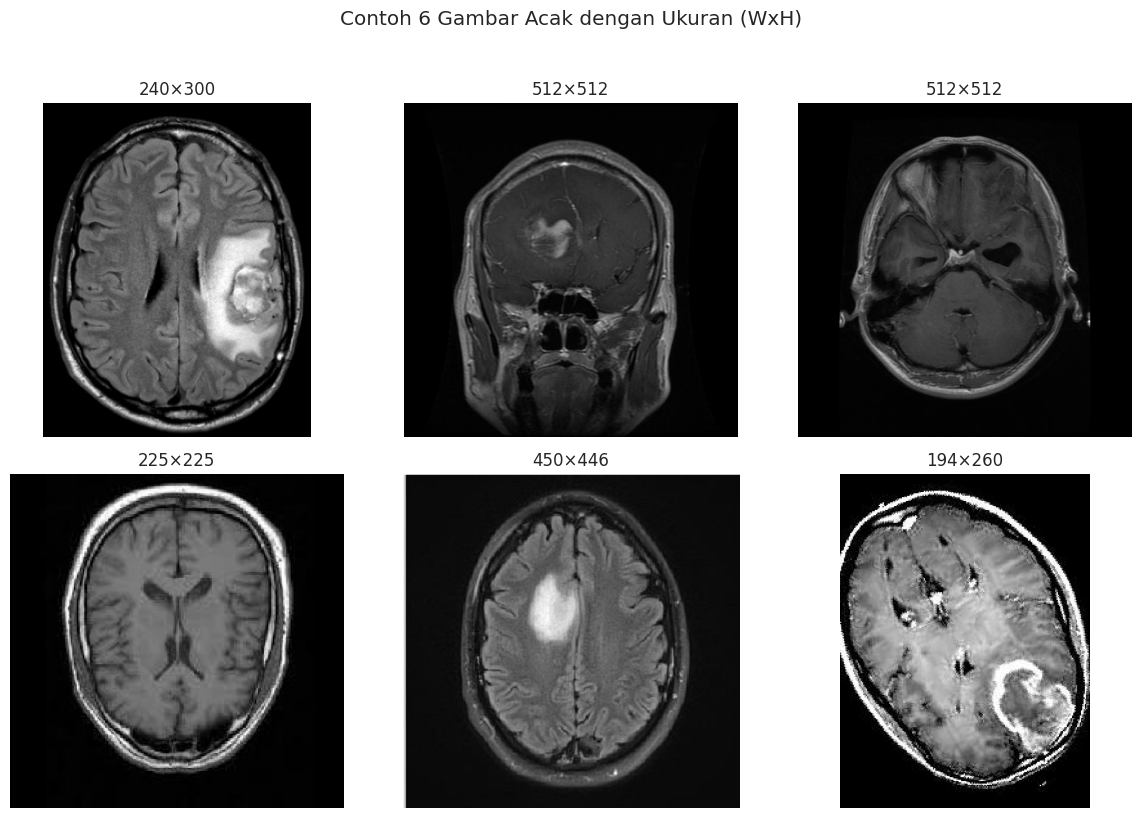

In [ ]:
# 3. Ukuran dimensi gambar

# Ambil 6 sampel acak dari dataset
sample_paths = random.sample(dataset.samples, k=6)

# Cetak dimensi dari masing-masing gambar
print("\nUkuran (dimensi) untuk 6 gambar acak:")
for img_path, _ in sample_paths:
    # Buka gambar dan ambil ukurannya
    with Image.open(img_path) as img:
        w, h = img.size  # Ambil lebar (w) dan tinggi (h)

    # Tampilkan nama file dan ukurannya
    print(f"  {Path(img_path).name}: {w} x {h}")

# (Opsional) Visualisasi keenam gambar beserta ukurannya

# Buat grid 2 baris x 3 kolom untuk menampilkan gambar
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Loop untuk menampilkan gambar dan ukurannya di subplot
for ax, (img_path, _) in zip(axes.flatten(), sample_paths):
    img = Image.open(img_path).convert("RGB")  # Buka dan konversi ke RGB
    w, h = img.size  # Ambil ukuran gambar
    ax.imshow(img)  # Tampilkan gambar di subplot
    ax.set_title(f"{w}×{h}")  # Judul subplot berupa ukuran gambar
    ax.axis("off")  # Hilangkan sumbu pada subplot

# Tambahkan judul utama di atas semua subplot
plt.suptitle("Contoh 6 Gambar Acak dengan Ukuran (WxH)", y=1.02)

# Atur tata letak supaya tidak tumpang tindih
plt.tight_layout()

# Tampilkan hasil visualisasi
plt.show()


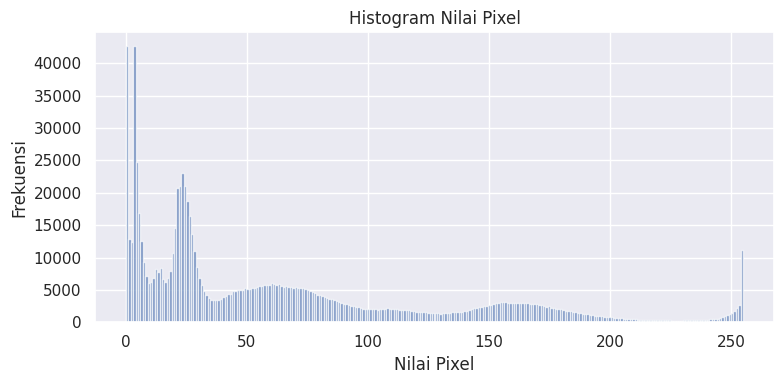

In [ ]:
# 4. Distribusi pixel (histogram nilai pixel)

# Inisialisasi list untuk menyimpan semua nilai pixel
all_pixels = []

# Ambil 6 sampel acak dari dataset, atau kurang jika dataset berisi < 6 gambar
sample_paths = random.sample(dataset.samples, k=min(6, len(dataset.samples)))

# Loop untuk setiap path gambar yang diambil
for path, _ in sample_paths:
    # Baca gambar dalam mode grayscale (hitam-putih)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Jika gambar gagal dibaca (None), lewati
    if img is None:
        continue

    # Flatten gambar menjadi 1D array dan tambahkan ke list all_pixels
    all_pixels.append(img.flatten())

# Gabungkan semua array pixel menjadi satu array besar
all_pixels = np.concatenate(all_pixels)

# Buat figure untuk histogram
plt.figure(figsize=(8,4))

# Plot histogram dari nilai pixel
plt.hist(all_pixels, bins=256, alpha=0.7)  # 256 bin sesuai dengan 256 tingkat keabuan (0-255)

# Tambahkan judul dan label
plt.title("Histogram Nilai Pixel")
plt.xlabel("Nilai Pixel")
plt.ylabel("Frekuensi")

# Atur layout agar rapi
plt.tight_layout()

# Tampilkan plot histogram
plt.show()


In [ ]:
# 6. Dimensi warna (jumlah channel)

# Ambil sampel maksimal 100 gambar (atau kurang jika dataset lebih kecil)
k = min(100, len(dataset.samples))
sample_paths = random.sample(dataset.samples, k=k)

# Inisialisasi Counter untuk menghitung distribusi jumlah channel
channel_counts = Counter()

# Loop setiap gambar di dalam sample
for img_path, _ in sample_paths:
    # Baca gambar tanpa mengubah format aslinya
    img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)

    # Jika gambar gagal dibaca, skip
    if img is None:
        continue

    # Jika gambar memiliki 3 dimensi, ambil jumlah channel dari dimensi ke-3
    # Kalau tidak, berarti grayscale → hanya 1 channel
    chans = img.shape[2] if img.ndim == 3 else 1

    # Tambahkan jumlah channel ke Counter
    channel_counts[chans] += 1

# Cetak distribusi jumlah channel dari seluruh sample
print(f"\nDistribusi jumlah channel pada sample {k} gambar:")
for chans, cnt in channel_counts.items():
    print(f"  {chans} channel: {cnt} gambar")

# Tampilkan detail contoh 6 gambar acak beserta jumlah channel-nya
print("\nContoh 6 gambar beserta jumlah channel-nya:")
for img_path, _ in random.sample(sample_paths, k=min(6, len(sample_paths))):
    # Baca gambar
    img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)

    # Ambil jumlah channel (sama seperti sebelumnya)
    chans = img.shape[2] if img.ndim == 3 else 1

    # Cetak nama file dan jumlah channel-nya
    print(f"  {Path(img_path).name}: {chans} channel")



Distribusi jumlah channel pada sample 100 gambar:
  3 channel: 94 gambar
  1 channel: 6 gambar

Contoh 6 gambar beserta jumlah channel-nya:
  Cancer (803).jpg: 3 channel
  Not Cancer  (1024).jpg: 3 channel
  Cancer (844).jpg: 3 channel
  Not Cancer  (898).jpg: 3 channel
  Cancer (85).tif: 3 channel
  Cancer (1816).jpg: 3 channel


# **Feature Extraction & Feature Selection & Model**

In [ ]:
data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/Brain Tumor Data Set/Brain Tumor Data Set'
data_dir = pathlib.Path(data_dir)

#splitfolders.ratio(data_dir, output='/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split', seed=20, ratio=(0.8, 0.2))

data_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/brain_split'
data_dir = pathlib.Path(data_dir)

In [ ]:
# Mendefinisikan Hyperparameters untuk training model
learning_rate = 1e-4      # Laju pembelajaran (seberapa besar update bobot pada setiap iterasi)
weight_decay = 0.01       # Parameter untuk regularisasi L2, mencegah overfitting
batch_size = 32           # Jumlah sampel data yang diproses dalam satu iterasi
num_epochs = 60           # Jumlah berapa kali keseluruhan dataset dilewatkan melalui model
num_classes = 2           # Jumlah kelas output (Tumor Otak, Sehat)
img_size = 224            # Ukuran gambar input (tinggi dan lebar)
patch_size = 16           # Ukuran patch untuk model Vision Transformer (ViT)
embed_dim = 768           # Dimensi vektor embedding untuk setiap patch
num_heads = 8             # Jumlah kepala dalam Multi-Head Attention di ViT
depth = 12                # Jumlah lapisan Transformer Encoder di ViT
mlp_dim = 3072            # Dimensi hidden layer di dalam MLP (Feed-Forward Network) ViT

# === Mendefinisikan Transformasi Data untuk Model ViT ===
# Transformasi untuk data training ViT
train_transform_vit = transforms.Compose([
    transforms.Resize((img_size, img_size)),    # Mengubah ukuran gambar
    transforms.RandomHorizontalFlip(p=0.5),     # Augmentasi: flip horizontal
    transforms.RandomVerticalFlip(p=0.5),       # Augmentasi: flip vertikal
    transforms.RandomRotation(30),              # Augmentasi: rotasi
    transforms.ColorJitter(brightness=0.3),     # Augmentasi: kecerahan
    transforms.ToTensor(),                      # Konversi ke Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Normalisasi
                         std=[0.229, 0.224, 0.225])
])

# Transformasi untuk data validasi ViT (tanpa augmentasi acak)
val_transform_vit = transforms.Compose([
    transforms.Resize((img_size, img_size)),    # Mengubah ukuran gambar
    transforms.ToTensor(),                      # Konversi ke Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Normalisasi
                         std=[0.229, 0.224, 0.225])
])

# Memuat dataset training dan validasi dengan transformasi yang sesuai untuk ViT
train_set_vit = ImageFolder(data_dir.joinpath("train"), transform=train_transform_vit)
val_set_vit = ImageFolder(data_dir.joinpath("val"), transform=val_transform_vit)

# Membuat DataLoader untuk memuat data secara batch, mengacak data training
train_loader = DataLoader(train_set_vit, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
# Membuat DataLoader untuk data validasi (tidak perlu diacak)
val_loader = DataLoader(val_set_vit, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# Mencetak ukuran dataset training dan validasi
print(f"Train size: {len(train_set_vit)} | Validation size: {len(val_set_vit)}")

Train size: 3679 | Validation size: 921


In [ ]:
# Menentukan device (perangkat) untuk training: 'cuda' jika GPU tersedia, jika tidak 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Membuat model Vision Transformer (ViT) menggunakan pustaka timm
vit_model = create_model(
   'vit_base_patch16_224',    # Nama arsitektur: ViT-Base dengan ukuran patch 16x16 dan input 224x224
   pretrained=True,           # Menggunakan bobot yang sudah dilatih sebelumnya pada dataset ImageNet
   num_classes=num_classes,   # Menyesuaikan layer output dengan jumlah kelas kita (2)
   drop_rate=0.1,             # Tingkat dropout untuk regularisasi
   drop_path_rate=0.1,        # Tingkat dropout pada koneksi antar blok transformer
   attn_drop_rate=0.1         # Tingkat dropout pada mekanisme attention
)

# Memindahkan model ke perangkat yang telah ditentukan (GPU atau CPU)
vit_model.to(device)
# === Menampilkan Ringkasan Model ===
# Menampilkan arsitektur model, jumlah parameter, dan ukuran output setiap layer
summary(vit_model, input_size=(3, img_size, img_size))

# === Mendefinisikan Fungsi Loss, Optimizer, dan Scheduler ===
# Mendefinisikan fungsi loss Cross-Entropy, cocok untuk masalah klasifikasi multi-kelas
criterion = nn.CrossEntropyLoss()
# Mendefinisikan optimizer AdamW, varian dari Adam yang lebih baik dalam menangani weight decay
optimizer = optim.AdamW(vit_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# Mendefinisikan scheduler untuk mengurangi learning rate secara otomatis jika loss validasi tidak membaik
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# === Loop Pelatihan (Training Loop) ===
# Menginisialisasi list untuk menyimpan nilai loss training dan validasi setiap epoch
train_losses, val_losses = [], []
# Melakukan iterasi sebanyak jumlah epoch yang telah ditentukan
for epoch in range(num_epochs):
    # Mengatur model ke mode training (mengaktifkan dropout, dll.)
    vit_model.train()
    # Menginisialisasi variabel untuk mengakumulasi loss dalam satu epoch
    running_loss = 0.0
    # Melakukan iterasi melalui setiap batch data di train_loader dengan progress bar
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        # Memindahkan gambar dan label ke device (GPU/CPU)
        images, labels = images.to(device), labels.to(device)

        # Mengosongkan gradien dari iterasi sebelumnya
        optimizer.zero_grad()
        # Melakukan forward pass: melewatkan gambar melalui model untuk mendapatkan output (logits)
        outputs = vit_model(images)
        # Menghitung loss antara prediksi model dan label sebenarnya
        loss = criterion(outputs, labels)
        # Melakukan backward pass: menghitung gradien loss terhadap parameter model
        loss.backward()
        # Memperbarui bobot model menggunakan optimizer
        optimizer.step()

        # Menambahkan loss dari batch ini ke total running_loss
        running_loss += loss.item()

    # Menghitung rata-rata loss training untuk epoch ini
    avg_train_loss = running_loss / len(train_loader)
    # Menyimpan rata-rata loss training
    train_losses.append(avg_train_loss)

    # === Fase Validasi ===
    # Mengatur model ke mode evaluasi (menonaktifkan dropout, dll.)
    vit_model.eval()
    # Menginisialisasi variabel untuk mengakumulasi loss validasi
    val_loss = 0.0
    # Mematikan perhitungan gradien untuk fase validasi untuk menghemat memori dan komputasi
    with torch.no_grad():
        # Melakukan iterasi melalui setiap batch data di val_loader
        for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            # Memindahkan gambar dan label ke device
            images, labels = images.to(device), labels.to(device)
            # Mendapatkan prediksi dari model
            outputs = vit_model(images)
            # Menghitung loss validasi
            loss = criterion(outputs, labels)
            # Menambahkan loss dari batch ini ke total loss validasi
            val_loss += loss.item()

    # Menghitung rata-rata loss validasi untuk epoch ini
    avg_val_loss = val_loss / len(val_loader)
    # Menyimpan rata-rata loss validasi
    val_losses.append(avg_val_loss)

    # Memperbarui scheduler dengan loss validasi. Jika tidak ada peningkatan, LR akan dikurangi.
    scheduler.step(avg_val_loss)

    # Mencetak ringkasan loss training dan validasi untuk epoch saat ini
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

# Mencetak pesan bahwa training telah selesai
print("Training selesai!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Param #
├─PatchEmbed: 1-1                        --
|    └─Conv2d: 2-1                       590,592
|    └─Identity: 2-2                     --
├─Dropout: 1-2                           --
├─Identity: 1-3                          --
├─Identity: 1-4                          --
├─Sequential: 1-5                        --
|    └─Block: 2-3                        --
|    |    └─LayerNorm: 3-1               1,536
|    |    └─Attention: 3-2               2,362,368
|    |    └─Identity: 3-3                --
|    |    └─Identity: 3-4                --
|    |    └─LayerNorm: 3-5               1,536
|    |    └─Mlp: 3-6                     4,722,432
|    |    └─Identity: 3-7                --
|    |    └─Identity: 3-8                --
|    └─Block: 2-4                        --
|    |    └─LayerNorm: 3-9               1,536
|    |    └─Attention: 3-10              2,362,368
|    |    └─Identity: 3-11               --
|    |    └─DropPath: 3-12          

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 1/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [1/60] - Train Loss: 0.6937 - Val Loss: 0.3913


Epoch 2/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 2/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [2/60] - Train Loss: 0.3207 - Val Loss: 0.1953


Epoch 3/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 3/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [3/60] - Train Loss: 0.1948 - Val Loss: 0.0992


Epoch 4/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 4/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [4/60] - Train Loss: 0.1298 - Val Loss: 0.0955


Epoch 5/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 5/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [5/60] - Train Loss: 0.1070 - Val Loss: 0.0715


Epoch 6/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 6/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [6/60] - Train Loss: 0.0932 - Val Loss: 0.0620


Epoch 7/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 7/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [7/60] - Train Loss: 0.0890 - Val Loss: 0.0816


Epoch 8/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 8/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [8/60] - Train Loss: 0.0769 - Val Loss: 0.0595


Epoch 9/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 9/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [9/60] - Train Loss: 0.0792 - Val Loss: 0.0668


Epoch 10/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 10/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [10/60] - Train Loss: 0.0958 - Val Loss: 0.0533


Epoch 11/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 11/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [11/60] - Train Loss: 0.0638 - Val Loss: 0.0581


Epoch 12/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 12/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [12/60] - Train Loss: 0.0617 - Val Loss: 0.0579


Epoch 13/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 13/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [13/60] - Train Loss: 0.0544 - Val Loss: 0.0385


Epoch 14/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 14/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [14/60] - Train Loss: 0.0533 - Val Loss: 0.0550


Epoch 15/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 15/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [15/60] - Train Loss: 0.0616 - Val Loss: 0.0567


Epoch 16/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 16/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [16/60] - Train Loss: 0.0423 - Val Loss: 0.0562


Epoch 17/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 17/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [17/60] - Train Loss: 0.0492 - Val Loss: 0.0571


Epoch 18/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 18/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [18/60] - Train Loss: 0.0228 - Val Loss: 0.0317


Epoch 19/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 19/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [19/60] - Train Loss: 0.0177 - Val Loss: 0.0354


Epoch 20/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 20/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [20/60] - Train Loss: 0.0127 - Val Loss: 0.0312


Epoch 21/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 21/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [21/60] - Train Loss: 0.0151 - Val Loss: 0.0353


Epoch 22/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 22/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [22/60] - Train Loss: 0.0111 - Val Loss: 0.0285


Epoch 23/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 23/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [23/60] - Train Loss: 0.0048 - Val Loss: 0.0377


Epoch 24/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 24/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [24/60] - Train Loss: 0.0062 - Val Loss: 0.0323


Epoch 25/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 25/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [25/60] - Train Loss: 0.0056 - Val Loss: 0.0373


Epoch 26/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 26/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [26/60] - Train Loss: 0.0128 - Val Loss: 0.0311


Epoch 27/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 27/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [27/60] - Train Loss: 0.0057 - Val Loss: 0.0298


Epoch 28/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 28/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [28/60] - Train Loss: 0.0126 - Val Loss: 0.0292


Epoch 29/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 29/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [29/60] - Train Loss: 0.0095 - Val Loss: 0.0284


Epoch 30/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 30/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [30/60] - Train Loss: 0.0066 - Val Loss: 0.0296


Epoch 31/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 31/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [31/60] - Train Loss: 0.0089 - Val Loss: 0.0291


Epoch 32/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 32/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [32/60] - Train Loss: 0.0061 - Val Loss: 0.0286


Epoch 33/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 33/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [33/60] - Train Loss: 0.0072 - Val Loss: 0.0288


Epoch 34/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 34/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [34/60] - Train Loss: 0.0105 - Val Loss: 0.0287


Epoch 35/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 35/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [35/60] - Train Loss: 0.0076 - Val Loss: 0.0286


Epoch 36/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 36/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [36/60] - Train Loss: 0.0077 - Val Loss: 0.0286


Epoch 37/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 37/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [37/60] - Train Loss: 0.0079 - Val Loss: 0.0288


Epoch 38/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 38/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [38/60] - Train Loss: 0.0067 - Val Loss: 0.0288


Epoch 39/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 39/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [39/60] - Train Loss: 0.0052 - Val Loss: 0.0288


Epoch 40/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 40/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [40/60] - Train Loss: 0.0069 - Val Loss: 0.0288


Epoch 41/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 41/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [41/60] - Train Loss: 0.0085 - Val Loss: 0.0288


Epoch 42/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 42/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [42/60] - Train Loss: 0.0082 - Val Loss: 0.0288


Epoch 43/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 43/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [43/60] - Train Loss: 0.0032 - Val Loss: 0.0288


Epoch 44/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 44/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [44/60] - Train Loss: 0.0042 - Val Loss: 0.0288


Epoch 45/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 45/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [45/60] - Train Loss: 0.0071 - Val Loss: 0.0288


Epoch 46/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 46/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [46/60] - Train Loss: 0.0053 - Val Loss: 0.0288


Epoch 47/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 47/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [47/60] - Train Loss: 0.0069 - Val Loss: 0.0288


Epoch 48/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 48/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [48/60] - Train Loss: 0.0074 - Val Loss: 0.0288


Epoch 49/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 49/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [49/60] - Train Loss: 0.0047 - Val Loss: 0.0288


Epoch 50/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 50/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [50/60] - Train Loss: 0.0074 - Val Loss: 0.0288


Epoch 51/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 51/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [51/60] - Train Loss: 0.0093 - Val Loss: 0.0288


Epoch 52/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 52/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [52/60] - Train Loss: 0.0045 - Val Loss: 0.0288


Epoch 53/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 53/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [53/60] - Train Loss: 0.0039 - Val Loss: 0.0288


Epoch 54/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 54/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [54/60] - Train Loss: 0.0078 - Val Loss: 0.0288


Epoch 55/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 55/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [55/60] - Train Loss: 0.0064 - Val Loss: 0.0288


Epoch 56/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 56/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [56/60] - Train Loss: 0.0061 - Val Loss: 0.0288


Epoch 57/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 57/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [57/60] - Train Loss: 0.0091 - Val Loss: 0.0288


Epoch 58/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 58/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [58/60] - Train Loss: 0.0061 - Val Loss: 0.0288


Epoch 59/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 59/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [59/60] - Train Loss: 0.0046 - Val Loss: 0.0288


Epoch 60/60 - Training:   0%|          | 0/115 [00:00<?, ?it/s]

Epoch 60/60 - Validation:   0%|          | 0/29 [00:00<?, ?it/s]

Epoch [60/60] - Train Loss: 0.0049 - Val Loss: 0.0288
Training selesai!


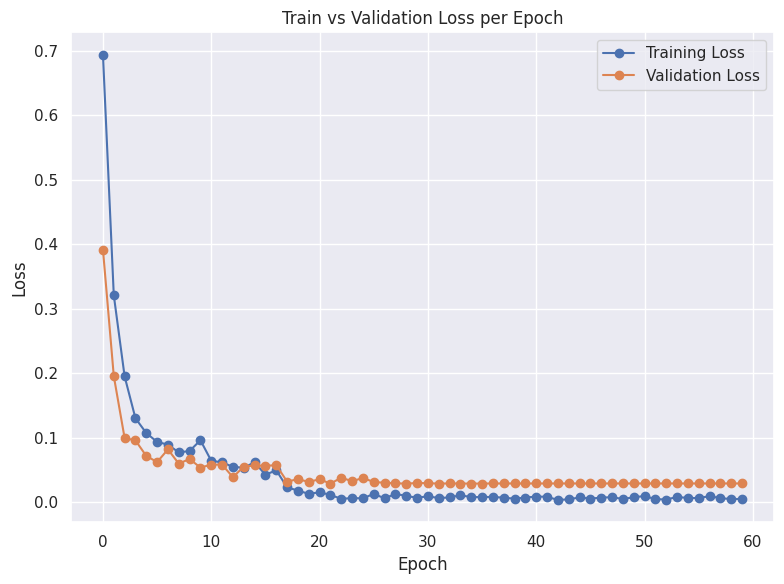

In [ ]:
# Membuat figure baru untuk plot loss
plt.figure(figsize=(8,6))
# Membuat plot untuk loss training dari waktu ke waktu (per epoch)
plt.plot(train_losses, label="Training Loss", marker='o')
# Membuat plot untuk loss validasi dari waktu ke waktu (per epoch)
plt.plot(val_losses, label="Validation Loss", marker='o')
# Menambahkan label pada sumbu x
plt.xlabel("Epoch")
# Menambahkan label pada sumbu y
plt.ylabel("Loss")
# Menambahkan judul pada plot
plt.title("Train vs Validation Loss per Epoch")
# Menampilkan legenda untuk membedakan garis plot
plt.legend()
# Menambahkan grid untuk kemudahan pembacaan
plt.grid(True)
# Menyesuaikan layout agar rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

Evaluating:   0%|          | 0/29 [00:00<?, ?it/s]

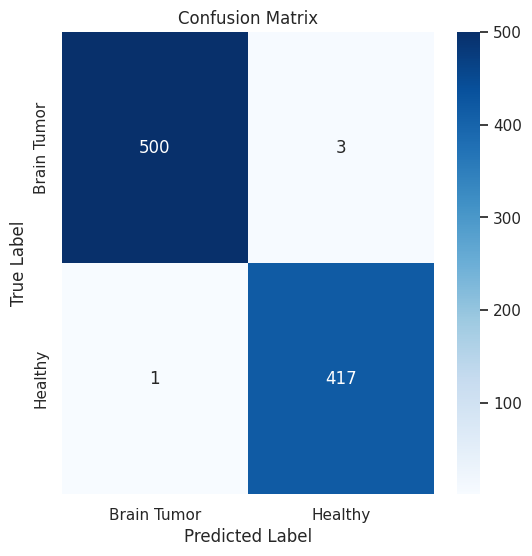

Classification Report:
               precision    recall  f1-score   support

 Brain Tumor       1.00      0.99      1.00       503
     Healthy       0.99      1.00      1.00       418

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



In [ ]:
# Mengatur model ke mode evaluasi
vit_model.eval()

# Menginisialisasi list kosong untuk menyimpan label asli (ground truth)
y_true = []
# Menginisialisasi list kosong untuk menyimpan prediksi model
y_pred = []

# Mematikan perhitungan gradien selama evaluasi
with torch.no_grad():
    # Melakukan iterasi melalui data validasi dengan progress bar
    for images, labels in tqdm(val_loader, desc="Evaluating"):
        # Memindahkan gambar ke device
        images = images.to(device)
        # Mendapatkan output (logits) dari model
        outputs = vit_model(images)
        # Mendapatkan prediksi kelas dengan mengambil indeks dari nilai output tertinggi
        _, preds = torch.max(outputs, 1)
        # Menambahkan label asli (yang ada di CPU) ke list y_true
        y_true.extend(labels.cpu().numpy())
        # Menambahkan prediksi model (yang ada di CPU) ke list y_pred
        y_pred.extend(preds.cpu().numpy())

# Membuat confusion matrix menggunakan label asli dan prediksi
cm = confusion_matrix(y_true, y_pred)
# Membuat laporan klasifikasi yang berisi precision, recall, f1-score
cr = classification_report(y_true, y_pred, target_names=list(train_set_vit.classes))

# Membuat plot untuk confusion matrix
plt.figure(figsize=(6,6))
# Menggunakan heatmap dari Seaborn untuk memvisualisasikan confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_set_vit.classes, yticklabels=train_set_vit.classes)
# Menambahkan label pada sumbu x
plt.xlabel("Predicted Label")
# Menambahkan label pada sumbu y
plt.ylabel("True Label")
# Menambahkan judul pada plot
plt.title("Confusion Matrix")
# Menampilkan plot
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", cr)

Evaluating:   0%|          | 0/29 [00:00<?, ?it/s]

ROC AUC Score: 0.9994


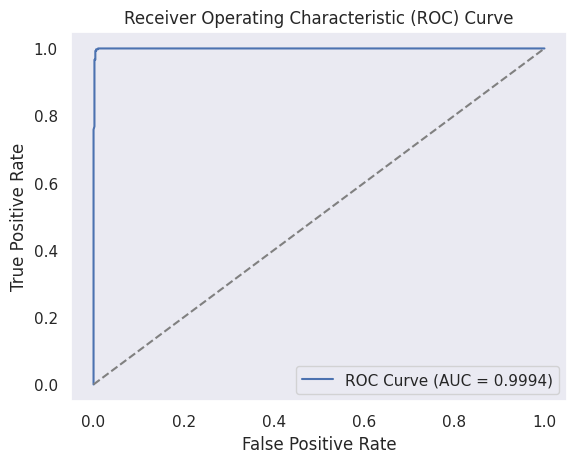

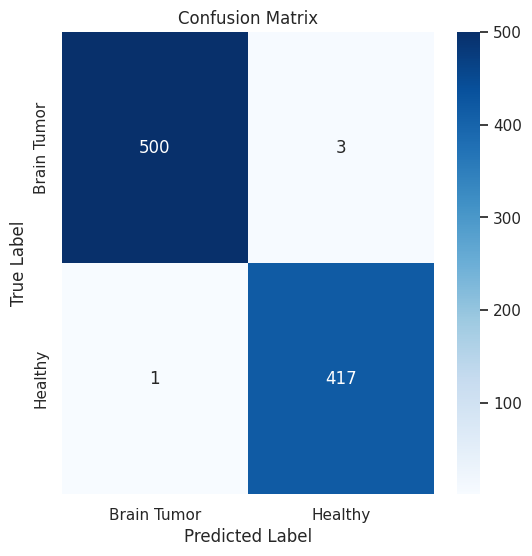

Classification Report:
               precision    recall  f1-score   support

 Brain Tumor       1.00      0.99      1.00       503
     Healthy       0.99      1.00      1.00       418

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



In [ ]:
# Mengatur model ke mode evaluasi
vit_model.eval()

# Menginisialisasi list untuk menyimpan label asli, prediksi, dan probabilitas prediksi
y_true = []
y_pred = []
y_probs = []

# Mematikan perhitungan gradien
with torch.no_grad():
    # Melakukan iterasi melalui data validasi
    for images, labels in tqdm(val_loader, desc="Evaluating"):
        # Memindahkan gambar dan label ke device
        images = images.to(device)
        labels = labels.to(device)

        # Mendapatkan output (logits) dari model
        outputs = vit_model(images)
        # Menerapkan fungsi softmax untuk mengubah logits menjadi probabilitas
        probs = torch.softmax(outputs, dim=1)
        # Mendapatkan kelas prediksi dari probabilitas tertinggi
        _, preds = torch.max(probs, 1)

        # Menyimpan label asli
        y_true.extend(labels.cpu().numpy())
        # Menyimpan prediksi kelas
        y_pred.extend(preds.cpu().numpy())
        # Menyimpan probabilitas untuk kelas positif (label 1) untuk kurva ROC
        y_probs.extend(probs[:, 1].cpu().numpy())

# === Menghitung dan Menampilkan ROC AUC Score dan Curve ===
# Menghitung skor Area Under the Curve (AUC) dari kurva ROC
roc_auc = roc_auc_score(y_true, y_probs)
# Mencetak skor ROC AUC
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) untuk plot kurva ROC
fpr, tpr, _ = roc_curve(y_true, y_probs)
# Membuat figure baru
plt.figure()
# Membuat plot kurva ROC
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
# Menambahkan garis diagonal sebagai referensi (model acak)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
# Menambahkan label sumbu x
plt.xlabel("False Positive Rate")
# Menambahkan label sumbu y
plt.ylabel("True Positive Rate")
# Menambahkan judul plot
plt.title("Receiver Operating Characteristic (ROC) Curve")
# Menampilkan legenda
plt.legend(loc="lower right")
# Menambahkan grid
plt.grid()
# Menampilkan plot
plt.show()

# === Confusion Matrix dan Classification Report (redundan, sudah ada di blok sebelumnya) ===
# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Membuat classification report
cr = classification_report(y_true, y_pred, target_names=list(train_set_vit.classes))

# Membuat plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_set_vit.classes,
            yticklabels=train_set_vit.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", cr)

# **Simpan**

Simpan ke .pth (format standar PyTorch)

In [ ]:
# Mengimpor pustaka os (sudah diimpor di awal)
import os
# Mendefinisikan direktori tujuan untuk menyimpan model
save_dir = '/content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/saved_model'
# Membuat direktori jika belum ada, exist_ok=True mencegah error jika folder sudah ada
os.makedirs(save_dir, exist_ok=True)

# Menggabungkan path direktori dan nama file untuk path penyimpanan lengkap
pth_path = os.path.join(save_dir, 'vit_model_brain.pth')
# Menyimpan hanya state_dict (bobot dan parameter yang telah dilatih) dari model
torch.save(vit_model.state_dict(), pth_path)
# Mencetak pesan konfirmasi lokasi penyimpanan model
print(f"Model disimpan dalam format .pth di: {pth_path}")

Simpan ke .pkl (menggunakan Python pickle)

In [ ]:
# Mengimpor pustaka pickle untuk serialisasi objek Python
import pickle
# Menggabungkan path direktori dan nama file untuk path penyimpanan .pkl
pkl_path = os.path.join(save_dir, 'vit_model_brain.pkl')
# Membuka file dalam mode 'write binary' (wb)
with open(pkl_path, 'wb') as f:
    # Menyimpan seluruh objek model (arsitektur + bobot) ke dalam file menggunakan pickle
    pickle.dump(vit_model, f)
# Mencetak pesan konfirmasi lokasi penyimpanan model
print(f"Model disimpan dalam format .pkl di: {pkl_path}")

Model disimpan dalam format .pkl di: /content/drive/MyDrive/TUGAS AI LANJUT/TUGASKU/saved_model/vit_model_brain.pkl
